In [83]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns

In [ ]:
clean = pd.read_excel("Clean.xlsx")

In [84]:
category = ["Price-Sensitive Customers" , "Product-Focused Customers" , "Loyalty-Driven Customers" , "Convenience-Oriented Customers" , "High-Value Customers"]

categories = []

for i in category:
    df = pd.read_excel("Category.xlsx" , sheet_name = i)
    categories.append(df)

In [85]:
df = categories[2]
df

,Purchase frequency,Hour_sin,Sale Price,Shopee-Paid Bundle Deal Discount
0,1.0,-0.258819,199.0,0
1,3.0,0.500000,22.0,0
2,3.0,0.500000,59.0,0
3,3.0,0.500000,55.0,0
4,3.0,0.258819,49.0,0
...,...,...,...,...
16600,4.0,-0.965926,35.0,0
16601,4.0,-0.965926,35.0,0
16602,3.0,-0.500000,49.0,0
16603,3.0,-0.500000,48.0,0


In [86]:
df.dropna(inplace = True)

In [87]:
df.columns

Index(['Purchase frequency', 'Hour_sin', 'Sale Price',
       'Shopee-Paid Bundle Deal Discount'],
      dtype='object')

**Data Preprocessing**

In [88]:
scaler = MinMaxScaler()
for feature in df.columns:
    df[[feature]] = scaler.fit_transform(df[[feature]])

In [89]:
sse = []
k_range = range(1 , 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

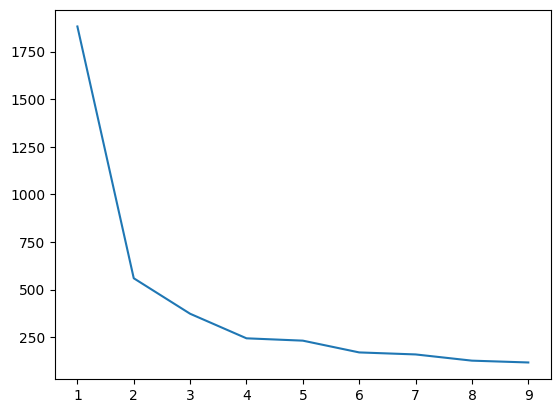

In [90]:
plt.plot(k_range , sse)

In [91]:
#4 is the elbow point
km = KMeans(n_clusters= 3)

In [92]:
km.fit(df)

KMeans(n_clusters=3)

In [93]:
y_pred = km.predict(df)

df["cluster"] = y_pred

In [94]:
cluster_list = []
for i in range(3):
    cluster_list.append(df[df["cluster"] == i])

In [95]:
cluster_list[0]

,Purchase frequency,Hour_sin,Sale Price,Shopee-Paid Bundle Deal Discount,cluster
7,0.000000,0.066987,0.016428,0.0,0
8,0.038462,0.017037,0.003710,0.0,0
9,0.038462,0.017037,0.004134,0.0,0
13,0.076923,0.146447,0.013672,0.0,0
14,0.076923,0.146447,0.000000,0.0,0
...,...,...,...,...,...
16600,0.115385,0.017037,0.003710,0.0,0
16601,0.115385,0.017037,0.003710,0.0,0
16602,0.076923,0.250000,0.005193,0.0,0
16603,0.076923,0.250000,0.005087,0.0,0


In [96]:
cluster_list[0][["Hour_sin"]].shape

(7125, 1)

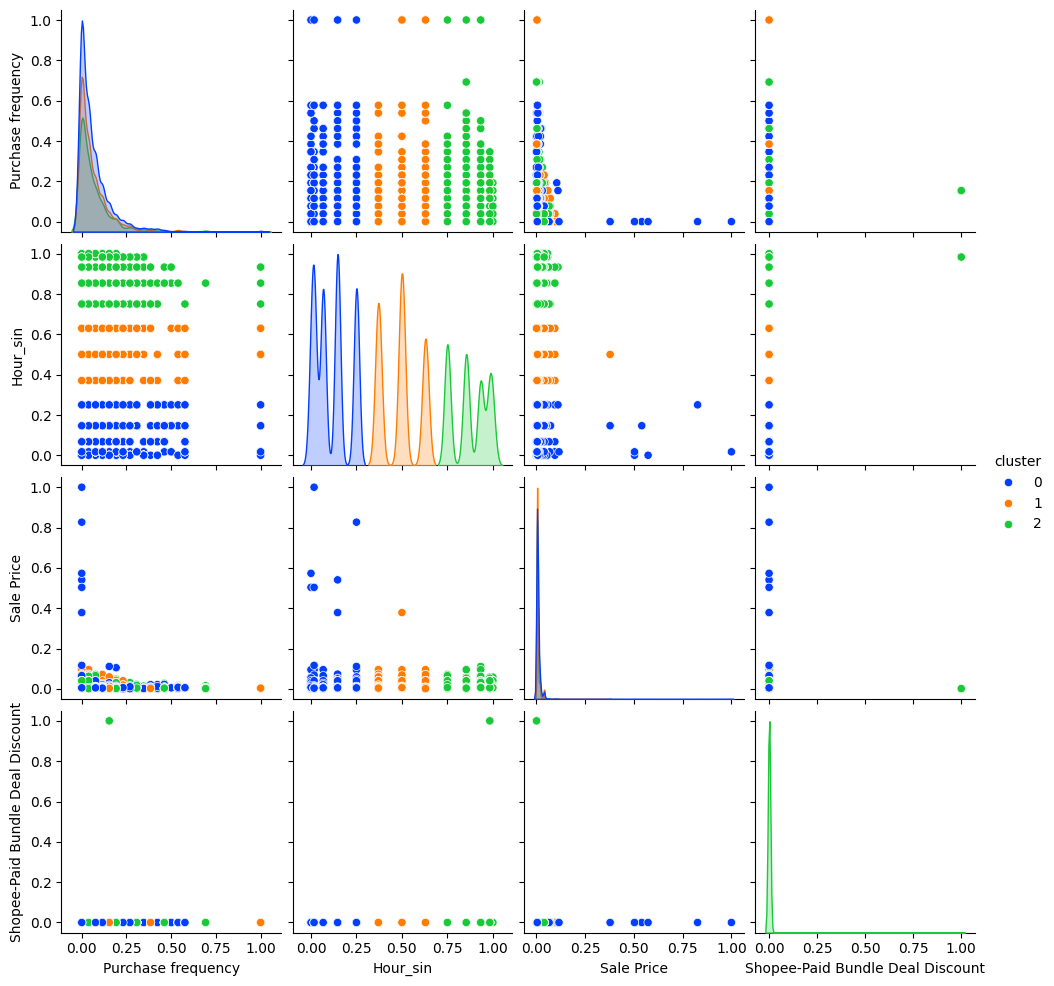

In [97]:
sns.pairplot(df , hue = "cluster" , palette= "bright")

<Axes: xlabel='Purchase frequency', ylabel='Sale Price'>

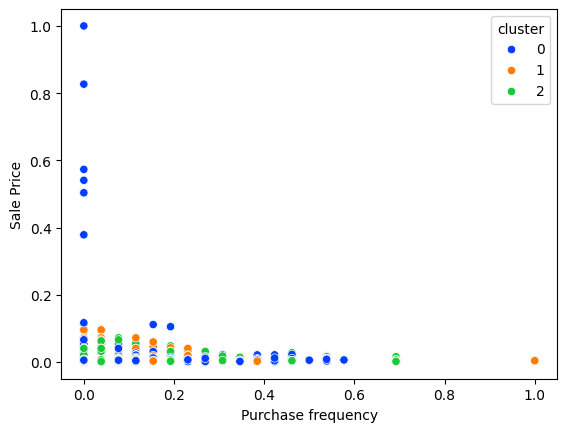

In [98]:
sns.scatterplot(data = df , x = "Purchase frequency" , y = "Sale Price" , hue = "cluster" , palette = "bright")

In [ ]:
def add_cat(x):

    if x["cluster"] == 2:
        x[category[0]] = True
    else:
        x[category[0]] = False

    return x

df.apply(add_cat , axis =  1)

clean[category[0]] = df[category[0]]

In [ ]:
clean.to_excel("Clean.xlsx")